In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

df  = pd.read_csv('../data/cuisines.csv')
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:>

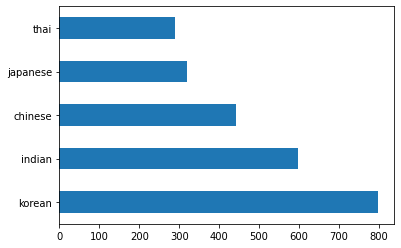

In [3]:
df.cuisine.value_counts().plot.barh()

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


<AxesSubplot:>

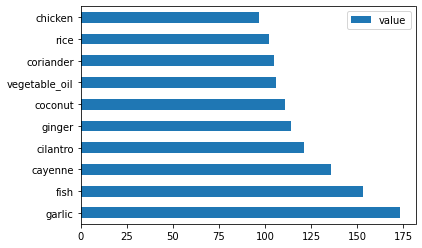

In [8]:
thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

def create_ingredient_df(df):
    ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False,
    inplace=False)
    return ingredient_df

thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df.head(10).plot.barh()

In [12]:
feature_df= df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
oversample = SMOTE()
labels_df = df.cuisine
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)


new label count: korean      799
japanese    799
chinese     799
thai        799
indian      799
Name: cuisine, dtype: int64
old label count: korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64


In [ ]:
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')
transformed_df.head()
transformed_df.info()
transformed_df.to_csv("../data/cleaned_cuisines.csv")